# <center> TP2 - 01 Description

# Objective of TP

In this TP you will develop the full **supervised learning pipeline** including the *hyper-parameter tuning* and *model evalutaion*.  

You will then apply the pipeline to three algorithms
* nearest neighbour
* decision tree
* default classifier

Finally, you will perform *model comparison* and **discuss** its results.

### Recommendation:
The code you will develop in this TP is to be re-used in TP3 and the exam.  
Therefore we recommend you try to make it clear (use comments, when printing say what you print) so that next time it is easier for you to remember what it does.  
Also, try to make the code generic so that it can be easilly used for different datasets.   
Try to automate as much as possible so that the code does not require too much of your attention, finally you will need to do the same type of analysis not for 3 algorithms but for 5-6.

## Dataset

You will be workig with the same cars dataset as in TP1.  
Each group shall be using the same `brands` as in TP1.


In [1]:
# Load dataset and extract our part
import pandas as pd

# Reading csv file
autos = pd.read_csv('autos.csv',encoding='latin-1')

# Extracting the relevant part for our group
only_specific_brands = autos.brand.isin(['renault', 'peugeot', 'skoda', 'citroen', 'ford'])
autos = autos[only_specific_brands]

In [2]:
autos.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,fast_sale
2,11400.0,limousine,2010.0,manuell,175.0,mondeo,125000.0,diesel,ford,nein,False
4,4100.0,kleinwagen,2009.0,manuell,68.0,1_reihe,90000.0,benzin,peugeot,nein,False
6,888.0,kombi,2000.0,manuell,115.0,mondeo,150000.0,benzin,ford,nein,True
7,13700.0,bus,2012.0,manuell,86.0,roomster,5000.0,benzin,skoda,nein,True
9,4299.0,kleinwagen,2010.0,manuell,75.0,2_reihe,125000.0,benzin,peugeot,nein,False


# Data preprocessing

Remember that after loading the dataset, there are several preprocessing steps you need to do before trainign the algorithm.
If you are not sure what these are, see *Course 8 - 02 Hyper-parameter tuning*.

When writing the code, **put short comments explaining what the pre-processing steps are and why you need to do them**.

### First we are changing the column names:

- We changed the style of writing the column names from camelcase to snakecase. This change will make column names easier to read, and we won't have to remember which letter is capitalized.
- We reworded some of the column names in order for them to be more descriptive and obvious.

In [3]:
# Changing the column names
autos.columns = ['price', 'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model', 
                 'kilometer', 'fuel_type', 'brand', 'unrepaired_damage', 'fast_sale']
autos.head()

,price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,fuel_type,brand,unrepaired_damage,fast_sale
2,11400.0,limousine,2010.0,manuell,175.0,mondeo,125000.0,diesel,ford,nein,False
4,4100.0,kleinwagen,2009.0,manuell,68.0,1_reihe,90000.0,benzin,peugeot,nein,False
6,888.0,kombi,2000.0,manuell,115.0,mondeo,150000.0,benzin,ford,nein,True
7,13700.0,bus,2012.0,manuell,86.0,roomster,5000.0,benzin,skoda,nein,True
9,4299.0,kleinwagen,2010.0,manuell,75.0,2_reihe,125000.0,benzin,peugeot,nein,False


### Next, we are going to convert some columns data type:

- We are changing data type in order to facilitate the data processing (classifying the data in numeric or categorical)
- We are converting column 'unrepaired_damage' from object to boolean type
- We are converting column 'registration_year' from float to int.

In [4]:
# Converting column 'unrepaired_damage' from object to boolean type
autos['unrepaired_damage'] = (autos['unrepaired_damage']
                 .str.replace('nein','')
                 .str.replace('ja','True')
                  .astype(bool)
                 )

In [5]:
# Converting column 'registration_year' from float to int.
autos['registration_year'] = (autos['registration_year'].astype(int))

# Is it relevant or we can simply keep it in float format ?

In [6]:
autos.info()
autos.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28401 entries, 2 to 166073
Data columns (total 11 columns):
price                28401 non-null float64
vehicle_type         28401 non-null object
registration_year    28401 non-null int64
gearbox              28401 non-null object
power_ps             28401 non-null float64
model                28401 non-null object
kilometer            28401 non-null float64
fuel_type            28401 non-null object
brand                28401 non-null object
unrepaired_damage    28401 non-null bool
fast_sale            28401 non-null bool
dtypes: bool(2), float64(3), int64(1), object(5)
memory usage: 2.2+ MB


,price,registration_year,power_ps,kilometer
count,28401.000000,28401.000000,28401.000000,28401.000000
mean,4177.515017,2003.965565,102.402979,121472.307313
std,4680.629533,5.872460,40.664873,39816.529262
min,1.000000,1923.000000,2.000000,5000.000000
25%,1199.000000,2001.000000,75.000000,100000.000000
50%,2500.000000,2004.000000,101.000000,150000.000000
75%,5400.000000,2008.000000,122.000000,150000.000000
max,73500.000000,2016.000000,952.000000,150000.000000


### Next, we are goint to decide what is output (target) and what is input:
- We do this because ...
- How we do it ...

In [7]:
# output dataframe
out_autos = autos['fast_sale']
# input dataframe
in_autos = autos.iloc[:,[0,1,2,3,4,5,6,7,8,9]]

print('Inputs')
display(in_autos.head())
print('Outputs')
display(out_autos.head())

Inputs


,price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,fuel_type,brand,unrepaired_damage
2,11400.0,limousine,2010,manuell,175.0,mondeo,125000.0,diesel,ford,False
4,4100.0,kleinwagen,2009,manuell,68.0,1_reihe,90000.0,benzin,peugeot,False
6,888.0,kombi,2000,manuell,115.0,mondeo,150000.0,benzin,ford,False
7,13700.0,bus,2012,manuell,86.0,roomster,5000.0,benzin,skoda,False
9,4299.0,kleinwagen,2010,manuell,75.0,2_reihe,125000.0,benzin,peugeot,False


Outputs


2    False
4    False
6     True
7     True
9    False
Name: fast_sale, dtype: bool

### Next, we convert categorical to numeric (one-hot encoding)

- The algorithms we use (except the deciscion tree) cannot operate on label data directly. They require all input variables and output variables to be numeric. Therefore we need to convert categorical data to a numerical form.
- Since no ordinal relationship exists in the categorical variables in our dataset (and we don't want to allow the model to assume a natural ordering between categories), we use the one-hot encoding. 

In [8]:
print('Original input data')
print('-------------------')
display(in_autos.head())

# Create one-hot encoding
in_long = pd.get_dummies(in_autos)
print('\n Numerical input data')
print('-------------------')
display(in_long.head())

Original input data
-------------------


,price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,fuel_type,brand,unrepaired_damage
2,11400.0,limousine,2010,manuell,175.0,mondeo,125000.0,diesel,ford,False
4,4100.0,kleinwagen,2009,manuell,68.0,1_reihe,90000.0,benzin,peugeot,False
6,888.0,kombi,2000,manuell,115.0,mondeo,150000.0,benzin,ford,False
7,13700.0,bus,2012,manuell,86.0,roomster,5000.0,benzin,skoda,False
9,4299.0,kleinwagen,2010,manuell,75.0,2_reihe,125000.0,benzin,peugeot,False



 Numerical input data
-------------------


,price,registration_year,power_ps,kilometer,unrepaired_damage,vehicle_type_andere,vehicle_type_bus,vehicle_type_cabrio,vehicle_type_coupe,vehicle_type_kleinwagen,...,fuel_type_cng,fuel_type_diesel,fuel_type_elektro,fuel_type_hybrid,fuel_type_lpg,brand_citroen,brand_ford,brand_peugeot,brand_renault,brand_skoda
2,11400.0,2010,175.0,125000.0,False,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,4100.0,2009,68.0,90000.0,False,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,888.0,2000,115.0,150000.0,False,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,13700.0,2012,86.0,5000.0,False,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,4299.0,2010,75.0,125000.0,False,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Next, we normalize (bring all variables to same scale [0,1])

-  We need to normalize the data to ensure that all sources are treated equally, and that data-availability bias (and its corresponding misrepresentation of the data universe) is reduced.

In [9]:
# maximum of each attribute
maxs = in_long.max(axis=0) # max accross rows (axis=0)

print('Maximums')
print('----------')
print(maxs)

# minimum of each attribute
mins = in_long.min(axis=0) # max accross rows (axis=0)

print('\n Minimums')
print('----------')
print(mins)

# min-max normalization
norm_in = (in_long - mins) / (maxs-mins)

# new maximum of each attribute
maxs = norm_in.max(axis=0) # max accross rows (axis=0)

print('\n New maximums')
print('----------')
print(maxs)

# new minimum of each attribute
mins = norm_in.min(axis=0) # max accross rows (axis=0)

print('\n New minimums')
print('----------')
print(mins)

Maximums
----------
price                       73500.0
registration_year            2016.0
power_ps                      952.0
kilometer                  150000.0
unrepaired_damage               1.0
vehicle_type_andere             1.0
vehicle_type_bus                1.0
vehicle_type_cabrio             1.0
vehicle_type_coupe              1.0
vehicle_type_kleinwagen         1.0
vehicle_type_kombi              1.0
vehicle_type_limousine          1.0
vehicle_type_suv                1.0
gearbox_automatik               1.0
gearbox_manuell                 1.0
model_1_reihe                   1.0
model_2_reihe                   1.0
model_3_reihe                   1.0
model_4_reihe                   1.0
model_5_reihe                   1.0
model_andere                    1.0
model_b_max                     1.0
model_berlingo                  1.0
model_c1                        1.0
model_c2                        1.0
model_c3                        1.0
model_c4                        1.0
model_c5

### As of this step, no more use of original data and only use preprocessed

In our case above: `out_autos` and `norm_in`

# Prepare for model evaluation and hyper-parameter tuning

### Data splits for model evaluation (training and testing)

You will need to write the code splitting the data to training set (used for model learning and hyper-parameter tuning) and test set used for final model evaluation (test error).

Here, you can choose to **use either 5-folds cross-validation or 5 time repeated hold-out method.**

**Tell us what your choice is and why**. Both choices are good, we just want to know that you understand the differences and you have thought about them.

Remember that in the end this procedure will be used for all your algorithms and that these should work over the same train/test splits. You can make sure this will be the case by fixing the seed for the random sample generation.

### 5-folds cross-validation
- We chose 5-folds cross-validation because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split (hold-out).
- The more folds we have, the more we will be reducing the error due the bias but increasing the error due to variance; the computational price would go up too, obviously — the more folds you have, the longer it would take to compute it and you would need more memory. With a lower number of folds, we’re reducing the error due to variance, but the error due to bias would be bigger. It’s would also computationally cheaper

In [113]:
from sklearn.model_selection import KFold


n_splits = 5
random_state = 1000
k_fold = KFold(n_splits=n_splits, random_state=random_state, shuffle=True) 

for train_index,test_index in k_fold.split(norm_in,out_autos):
    print(f'TRAIN: {train_index} | TEST: {train_index}')
    in_train, in_test= norm_in.iloc[train_index], norm_in.iloc[test_index]
    out_train, out_test = out_autos.iloc[train_index], out_autos.iloc[test_index]

print('Test outputs')
display(out_autos.iloc[train_index].head())
print('Test inputs')
display(norm_in.iloc[test_index].head())  

TRAIN: [    1     2     5 ... 28397 28398 28400] | TEST: [    1     2     5 ... 28397 28398 28400]
TRAIN: [    0     1     2 ... 28397 28398 28399] | TEST: [    0     1     2 ... 28397 28398 28399]
TRAIN: [    0     3     4 ... 28398 28399 28400] | TEST: [    0     3     4 ... 28398 28399 28400]
TRAIN: [    0     1     2 ... 28395 28399 28400] | TEST: [    0     1     2 ... 28395 28399 28400]
TRAIN: [    0     1     2 ... 28398 28399 28400] | TEST: [    0     1     2 ... 28398 28399 28400]
Test outputs


2    False
4    False
6     True
7     True
9    False
Name: fast_sale, dtype: bool

Test inputs


,price,registration_year,power_ps,kilometer,unrepaired_damage,vehicle_type_andere,vehicle_type_bus,vehicle_type_cabrio,vehicle_type_coupe,vehicle_type_kleinwagen,...,fuel_type_cng,fuel_type_diesel,fuel_type_elektro,fuel_type_hybrid,fuel_type_lpg,brand_citroen,brand_ford,brand_peugeot,brand_renault,brand_skoda
62,0.008150,0.784946,0.076842,0.586207,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
78,0.029919,0.881720,0.135789,1.000000,0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
108,0.095226,0.935484,0.094737,0.827586,0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
143,0.019034,0.881720,0.155789,1.000000,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
152,0.000122,0.849462,0.044211,0.827586,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Data splits for hyper-parameter tuning

Here we want you to **use 3-folds inner cross validation**.

You will need to write the code to split each of the training sets above to train/validation accoridng to the 3-fold cross-validation strategy.

### 3-folds inner cross validation 

In [114]:
from sklearn.model_selection import KFold


n_splits = 3
random_state = 1000
k_fold = KFold(n_splits=n_splits, random_state=random_state, shuffle=True) 

for train_index,test_index in k_fold.split(norm_in,out_autos):
    print(f'train: {train_index} | test: {test_index}')
#     in_train, in_test= norm_in.iloc[train_index], norm_in.iloc[test_index]
#     out_train, out_test = out_autos.iloc[train_index], out_autos.iloc[test_index]
  
# print('Test outputs')
# display(out_autos.iloc[train_index].head())
# print('Test inputs')
# display(norm_in.iloc[test_index].head())  

train: [    1     2     5 ... 28397 28398 28400] | test: [    0     3     4 ... 28393 28395 28399]
train: [    0     3     4 ... 28397 28398 28399] | test: [    1     2    11 ... 28388 28394 28400]
train: [    0     1     2 ... 28395 28399 28400] | test: [    5    10    12 ... 28396 28397 28398]


### Generalization accuracy

You will also need to prepere the code that will use the trained models to produce predictions for the test instances, calculate the accuracy of over each test set, and calculate the final average accuracy over all the test instances (estimate of generalization accuracy).

In [12]:
# from sklearn import neighbors
# def intance_predicting(classifier_object,test,instance):
#     one_instance = pd.DataFrame(test.iloc[instance,:]).transpose()
#     return classifier_object.predict(one_instance)[0]
# def default_prediction(out_train,test):
#     class_counts = out_train.value_counts()
#     majority_class = class_counts.idxmax()
#     pred_test = test.copy()
#     pred_test[:] = majority_class
#     return pred_test

# Train and test nearest neigbour model

Once you have the general procedure in place, train the nearest neigbour model.

### Hyper-parameter search

Hyper-parameter in nearest neighbour algorithm is the number of neighbours to use.
We want you to try at least 5 different values. **Tell us which values you decide to try.** (There is no Why questoin here.)

Remember that for choosing the best hyper-parameter value, you use the the inner cross validation and the best hyper-parameter is the one with the highest average accuracy over the validation sets.

### Model lerning and test accuracy

Once you have the best value of the hyper-parameter, you use it to **retrain** the model over the merged train+validation (you do this 5 times, see above *Data splits for model evaluation*). You then use this **retrained** model to get the final test accuracy.

For each of the test samples (there should be 5, see above), report the test accuracy and the corresponding hyper-parameter setting (the one chosen as best for this specific split).

Are the hyper-parameter parameters the same for all the test sets? **Discuss** if you think this is  normal or not, why it happens and if it creates some difficulties for interpreting the model. **There is no single correct answer here!** We want to see that you undertand the procedure and that you use your brain.



### Comment
- We decided to use xxx values
- We found that the best hyper-parameter value is yyy, because it has the highest average accuracy over the validation sets.

In [13]:
# 1. Find best hyper-parameter to use
# 2. Retrain the model over the merged train+validation 5 times
# 3. Use the retrained model to get the final test accuracy 
# 4. For each of the test samples (5), report the test accuracy and the corresponding hyper-parameter
# 5. Discuss and show that we understand the procedure

In [141]:
# 1. Find best hyper-parameter to use

from sklearn import neighbors
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# try K=1 through K=20 and record testing accuracy
k_range = range(1, 25)

# keeping the accuracy scores
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(in_train,out_train)
    y_pred = knn.predict(in_test)
    scores.append(metrics.accuracy_score(out_test, y_pred))

print(scores)

[0.5508802816901408, 0.5325704225352113, 0.5373239436619718, 0.536443661971831, 0.5403169014084507, 0.5390845070422535, 0.5482394366197183, 0.546830985915493, 0.5494718309859155, 0.5452464788732394, 0.5517605633802817, 0.548943661971831, 0.5514084507042254, 0.541725352112676, 0.5461267605633803, 0.5443661971830986, 0.5505281690140845, 0.5470070422535211, 0.5491197183098592, 0.5494718309859155, 0.5480633802816901, 0.5498239436619718, 0.5526408450704225, 0.5508802816901408]


22


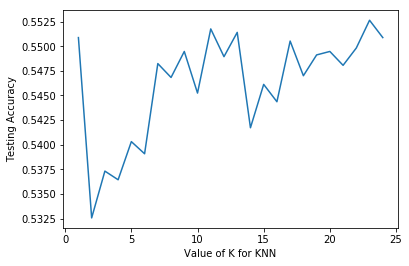

In [143]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

max(scores)
best_n_neighbors = scores.index(max(scores))
print(best_n_neighbors)

- Training accuracy rises as model complexity increases
- Testing accuracy penalizes models that are too complex or not complex enough
- Above a K of 25 testing accuracy drops sharply
- We found the best value to be K=22

In [144]:
# 2. Retrain the model over the merged train+validation 5 times

from sklearn import neighbors


k = best_n_neighbors

# creaate nearest neighbour classifier object
nn_classifier = neighbors.KNeighborsClassifier(n_neighbors=k)

# learn model using the training set inputs and outputs
nn_classifier.fit(in_train,out_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=22, p=2,
           weights='uniform')

In [145]:
# 3. Use the retrained model to get the final test accuracy 

# prediction for all train data
preds_train = nn_classifier.predict(in_train)
print('Prediction for train data')
print('------------------------')
display(preds_train)

# prediction for all test data
preds_test = nn_classifier.predict(in_test)
print('\n Prediction for test data')
print('------------------------')
display(preds_test)

# get test set accuracy
match_preds = preds_test==out_test
accuracy_test = match_preds.sum()/match_preds.count()
print('Test accuracy', accuracy_test)

# get train set accuracy
match_preds = preds_train==out_train
accuracy_train = match_preds.sum()/match_preds.count()
print('Train accuracy', accuracy_train)

Prediction for train data
------------------------


array([False, False,  True, ...,  True, False, False])


 Prediction for test data
------------------------


array([ True,  True, False, ..., False,  True,  True])

Test accuracy 0.5498239436619718
Train accuracy 0.6132652612120946


# Train and test decision tree

Use the same general procedure to train a decision tree.

Hyper-parameters for decision trees are the pre-prunning criteria such as maximum number of leafs (see *Course 5 - 02 Decision tree prunning*). 
Pick one of these and use at least 5 different values. **Tell us which one you pick and what values you are using.**

Calculate and report the test accuracies together with their corresponding heper-parameter values. (No more comments needed here.)

In [148]:
from sklearn import tree


def deciscion_tree_classifier(out_train, out_test, in_train, in_test, max_leaf_nodes=15):
    # instantiate decition tree classifier
    dt_clf = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)

    # learn tree on train data
    dt_clf = dt_clf.fit(in_train,out_train)

    # make predictions for train and test set
    pred_train = dt_clf.predict(in_train)
    pred_test =  dt_clf.predict(in_test)

    # calculate train accuracy
    train_accuracy = calculate_pred_accuracy(pred_train, out_train)

    # calculate test accuracys
    test_accuracy = calculate_pred_accuracy(pred_test, out_test)

    return (train_accuracy, test_accuracy, dt_clf)

In [150]:
import random


random.seed(10000)
dt_clf_accuracies = list()
dt_clf = None

for _ in range(0, 10):
    out_train, out_test, in_train, in_test = kfold_spliting(norm_in, out_autos, 5, 1000)
    train_acc, test_acc, dt_clf = deciscion_tree_classifier(out_train, out_test, in_train, in_test)
    accuracy_couple = (train_acc, test_acc)
    dt_clf_accuracies.append(accuracy_couple)

TRAIN: [    1     2     5 ... 28397 28398 28400] | TEST: [    1     2     5 ... 28397 28398 28400]
TRAIN: [    0     1     2 ... 28397 28398 28399] | TEST: [    0     1     2 ... 28397 28398 28399]
TRAIN: [    0     3     4 ... 28398 28399 28400] | TEST: [    0     3     4 ... 28398 28399 28400]
TRAIN: [    0     1     2 ... 28395 28399 28400] | TEST: [    0     1     2 ... 28395 28399 28400]
TRAIN: [    0     1     2 ... 28398 28399 28400] | TEST: [    0     1     2 ... 28398 28399 28400]


NameError: name 'calculate_pred_accuracy' is not defined

In [146]:
from sklearn.model_selection import KFold


def kfold_spliting(input_data, output_data, n_splits, random_state, shuffle=True):
    k_fold = KFold(n_splits=n_splits, random_state=random_state, shuffle=True) 

    for train_index,test_index in k_fold.split(norm_in,out_autos):
        print(f'TRAIN: {train_index} | TEST: {train_index}')
        in_train, in_test= norm_in.iloc[train_index], norm_in.iloc[test_index]
        out_train, out_test = out_autos.iloc[train_index], out_autos.iloc[test_index]
    
    return (out_train, out_test, in_train, in_test)
    

In [22]:
# Calculate average accuracy for Deciscion Tree
train_accuracy, test_accuracy = calculate_average_accuracy(dt_clf_accuracies)

print('Average train accuracy: ',train_accuracy)
print('Average test accuracy: ',test_accuracy) 

# Train and test default classifier

Default classifier has no hyper-parameters, so you can skip the inner-cross validatoin procedure.

Calculate and report the test accuracies for the 5 test sets from the part *Data splits for model evaluation*

In [23]:
# from sklearn.model_selection import train_test_split


# def default_classifier(out_train, out_test):
#     # get counts per class
#     class_counts = out_train.value_counts()

#     majority_class = class_counts.idxmax()

#     # make predictions for train and test set
#     pred_train = out_train.copy()
#     pred_train[:] = majority_class

#     pred_test = out_test.copy()
#     pred_test[:] = majority_class

#     # calculate train accuracy
#     train_accuracy = calculate_pred_accuracy(pred_train, out_train)

#     # calculate test accuracy
#     test_accuracy = calculate_pred_accuracy(pred_test, out_test)
    
#     return (train_accuracy, test_accuracy)

In [24]:
# import random


# random.seed(10000)
# default_clf_accuracies = list()

# for _ in range(0, 10):
#     out_train, out_test, in_train, in_test = split_data(
#                                                     df=autos, 
#                                                     target_var='fast_sale', 
#                                                     in_columns=[0,1,2,3,4,5,6,7,8], 
#                                                     train_size=2/3, 
#                                                     test_size=1/3,
#                                                     random_seed=random.randint(1, 10000)
#                                              )
#     default_clf_accuracies.append(default_classifier(out_train, out_test))

In [25]:
# # Calculate average accuracy for Default Dlassifer
# train_accuracy, test_accuracy = calculate_average_accuracy(default_clf_accuracies)

# print('Average train accuracy: ',train_accuracy)
# print('Average test accuracy: ',test_accuracy) 

#  /!\ THIS IS THE MOST IMPORTANT PART /!\

# Compare models

Once you have all your test accuracies for the nearest neighbour, decision trees and default classifier, calculate the estimated generalization accuracy of each (the everage accuracy accross the test sets).

Is any of the algorithms peforming better than the other two? **Discuss, comment.**

## Use the McNemar test 

Use the McNemar test to verify whether the differences in the generalization accuracy are significant. 

In McNemar you can always compare only two algorithms. Do all the pair-wise comparisons, present and **explain** the results. Are these what you would expect?

# Comparing the models

### Write an observation for each algorithm and compare performance
#### ==>
### Explain WHY some algorithms are better than the others
#### ==>

# The McNemar test

### Nearest neighbour vs Decision trees 
#### Result
#### Explaination
### Nearest neighbour vs Default classifier
#### Result
#### Explaination
### Decision trees vs Default classifier
#### Result
#### Explaination

 # Supervised learning pipeline with hyper-parameter tuning
 ### Automate as much as possible
 
#### Note: 1 and 2 are always somewhat different for new data set -> keep doing what we do
1. load data
2. data preprocessing
 * check and clean data (missing values, outliers) - not covered in DM course, hope you know from stats!
 * input vs output - decide what is output (target) and what input
 * numerical vs categorical data -  decide which is which and how to treat in the following
 * convert categorical to numeric (one-hot encoding)
 * normalization (bring all variables to same scale [0,1])
 * drop original data and keep working with these
 
========> DONE <========
 
#### Note: 3 to 7 are always the same procedures no matter what is the data set -> generalize the process 
3. prepare for training and testing
 * create train / test splits of data
 * remember one ranodm split not reliable if train and test sets not really big
 * use repated holdout, k-folds cross validation or repated bootstrap
4. prepare for hyper-parameter tuning
 * use inner cross-validation to split train set to train (for learning) and validation (for hyper-param seletction)
 * train and validate model for each hyper-parameter value
 * select best hyper-parameter (lowest error on average on validation sets)
5. train (learn) model $\mathbf{f} : \mathcal{X} \to \mathcal{Y}$  over train+validation sets using best hyper-param from step 3.
6. use the learned model $\mathbf{f}$ to do predictions
7. use test sets to get estimate of generalization error (accuracy)

Remember that steps 4.-7. need to be repeated for every train/test pslit from the outer cross-validation (out repated holdout splits)

#### Note: no idea yet
8. Try another model
 * eg. switch from decision trees to nearest neighbours
 * repeat the whole procedure
 * can you get better average test accuracy?
9. understand and describe models
 * how they work
 * how they predict
 * why one may be better than the other